# Assignment 4
To complete this assignment, I suggest that you read: <br>
1D_Signal_Processing_Conv_temperature.ipynb <br>
1D_Signal_Processing_Conv_peak.ipynb <br> 
If you understand the above two files, this assignment will be super easy
==============================================================================<br>
The only requirement:  <br>
This ipynb file has 11 code cells. <br>
Do NOT add or remove any cells <br>
A code cell does what it is supposed to do  <br>
For example, cell In [2] is to load data from ecg_data1.csv using pandas  <br>
==============================================================================<br>
Once you complete the file, go to the menu: Kernel -> Restart & Run All, and check the output of each cell

In [1]:
# import the modules in the first cell
%matplotlib notebook
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import scipy
import scipy.ndimage

Load the ECG data from ecg_data1.csv using pandas <br>
ATTN: this ipynb file of the assignment and the data file ecg_data1.csv should be in the same file folder  <br>
the ECG signal should be stored in a numpy array  <br>
the Sampling Rate is known as 1000Hz  <br>

In [2]:
# load data from ecg_data1.csv using pandas
# Get the 'Amp' volume and convert it to a numpy array x
# write your code here
data = pd.read_csv('ecg_data1.csv')
x = data['Amp'].values
print(x)

[2044. 2044. 2044. ... 2044. 2045. 2043.]


In [3]:
#read but do not modify this section
fs = 1000 # sampling rate (Hz)
Ts = 1/fs # sampling intervel (seconds)
N = x.shape[0] # total number of data points in the ECG signal x
Duration= N*Ts #seconds

Visualize the ECG signal x

Text(0.5, 1.0, 'ECG signal x')

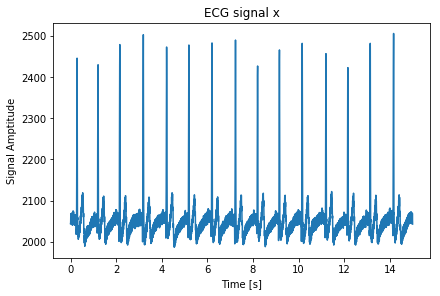

In [4]:
# write your code here
t = np.linspace(0, Duration, N, endpoint=False)

fig, ax = plt.subplots(1,1,constrained_layout = True)
ax.plot(t,x,'-')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amptitude')
ax.set_title('ECG signal x')


Build a GaussianKernel for smoothing the ECG signal x

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


(-0.01, 0.009)

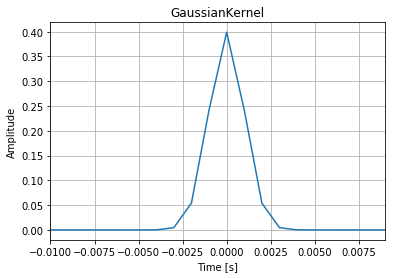

In [5]:
# hint: try to use different sigma
# write your code here
# write your code here
import scipy
import scipy.ndimage
from scipy.signal import find_peaks

tg = np.linspace(-0.05, 0.05, (0.05+0.05)*fs, endpoint=False) # an array of timepoints, duration is 0.1 s
sigma = 0.001
GaussianKernel = np.exp(-tg**2/(2*sigma**2))
GaussianKernel /= GaussianKernel.sum()

fig, ax = plt.subplots()
ax.plot(tg, GaussianKernel, '-')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.grid(True)
ax.set_title('GaussianKernel')
ax.set_xlim([-0.01, 0.009])


Smooth the ECG signal x using convolution with GaussianKernel <br>
Visualize the smoothed signal x_smoothed

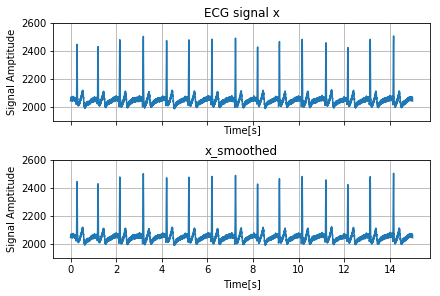

In [6]:
#noisyx:
x_noisy = x + np.random.rand(x.shape[0])
#convolution
x_smoothed = scipy.ndimage.convolve(x_noisy, GaussianKernel, mode = 'nearest')

fig, ax = plt.subplots(2,1, sharex = True, constrained_layout = True)
ax[0].plot(t, x, '-')
ax[0].set_xlabel('Time[s]'); ax[0].set_ylabel('Signal Amptitude'); ax[0].set_ylim([1900, 2600])
ax[0].set_title('ECG signal x')
ax[0].grid(True)


ax[1].plot(t, x_smoothed, '-')
ax[1].set_xlabel('Time[s]'); ax[1].set_ylabel('Signal Amptitude'); ax[1].set_ylim([1900, 2600])
ax[1].set_title('x_smoothed')
ax[1].grid(True)

Perform peak detection using two convolution kernals <br>

In [7]:
# in this section, a numpy array PeakIndexArray is obtained
# which stores the indexes of the detected peaks in the ECG signal x
# write your code here
peaks, _ = find_peaks(x, distance = 1)

PeakIndexArray = peaks


Visualize the ECG signal and the detected peaks

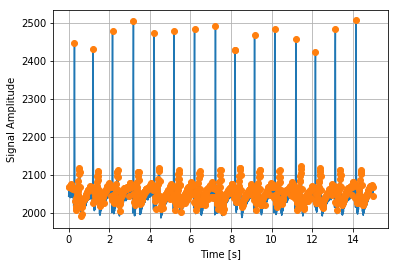

In [8]:
# write your code here
fig, ax = plt.subplots()
ax.plot(t, x, '-')
ax.plot(t[PeakIndexArray], x[PeakIndexArray], 'o')

ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.grid(True)


We need to find the R-peaks <br>
https://en.wikipedia.org/wiki/Electrocardiography  <br>
Select those peaks with amplitude values > threshold (e.g. 2200) <br>

In [9]:
# hint:
# assume the numpy array PeakIndexArray stores the indexes of the detected peaks in the ECG signal x
# then we can use the function np.where to find the the indexes of the peaks with amplitudes > threshold
# try this: RPeakIndexArray=PeakIndexArray[np.where(x[PeakIndexArray] > threshold)]
# write your code here

RPeakIndexArray = PeakIndexArray[np.where(x[PeakIndexArray] > 2400)]
RPeakIndexArray

array([  286,  1206,  2161,  3191,  4212,  5190,  6203,  7233,  8201,
        8203,  9160, 10158, 11200, 12161, 13142, 14165])

Visualize the R-peaks

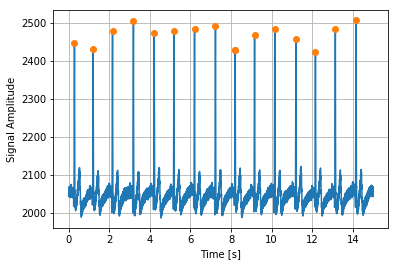

In [10]:
# write your code here
t[RPeakIndexArray]
x[RPeakIndexArray]


fig, ax = plt.subplots()
ax.plot(t, x, '-')
ax.plot(t[RPeakIndexArray], x[RPeakIndexArray], 'o')

ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.grid(True)


Calculate heart rate per minute based on the R-wave peaks

array([65, 65, 62, 58, 58, 61, 59, 58, 61, 61, 62, 60, 57, 62, 61, 58])

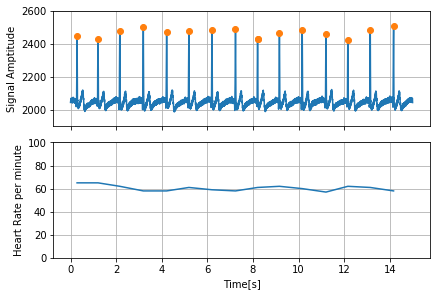

In [11]:
# hint:
# assume the numpy array RPeakIndexArray stores the indexes of the R-peaks in the ECG signal x
# step-1: create a numpy array (google np.zeros) that has the same shape as RPeakIndexArray
# step-2: in a range-based for loop: HeartRate[n]=60*fs/(RPeakIndexArray[n]-RPeakIndexArray[n-1])
#         It should be range(1, RPeakIndexArray.shape[0]), think about why not range(0, RPeakIndexArray.shape[0])
# step-3: set HeartRate[0] to be equal to HeartRate[1]
# step-4: plot the signal x and the HeartRate curve
#         RPeakIndexArray stores the indexes, not timepoints
#         to get the timepoints: RPeakTimeArray = RPeakIndexArray*Ts
# write your code here

HeartRate = np.zeros_like(RPeakIndexArray)


for n in range(1, RPeakIndexArray.shape[0]):
    HeartRate[n]= 60*fs/(RPeakIndexArray[n]-RPeakIndexArray[n-1])
    
RPeakIndexArray
HeartRate[0] = HeartRate[1]


#Clean outlier:

threshold = 3
mean_1 = np.mean(HeartRate)
std_1 = np.std(HeartRate)
NewHeartRate = np.zeros_like(HeartRate)

for n in range(0,HeartRate.shape[0]):
    z_score = (HeartRate[n]-mean_1)/std_1
    if np.abs(z_score)<threshold:
          NewHeartRate[n] = HeartRate[n]

Outlier = np.setdiff1d(HeartRate, NewHeartRate)

#RPeakTimeArray = timepoints
RPeakTimeArray = RPeakIndexArray*Ts
NewHeartRate[9] = NewHeartRate[8]

fig, ax = plt.subplots(2,1, sharex = True, constrained_layout = True)
ax[0].plot(t, x, '-')
ax[0].plot(t[RPeakIndexArray], x[RPeakIndexArray], 'o')
ax[0].set_ylabel('Signal Amptitude'); ax[0].set_ylim([1900, 2600])
ax[0].grid(True)


ax[1].plot(RPeakTimeArray, NewHeartRate, '-')
ax[1].set_xlabel('Time[s]'); ax[1].set_ylabel('Heart Rate per minute'); ax[1].set_ylim([0, 100])
ax[1].grid(True)
RPeakIndexArray

NewHeartRate